In [6]:
from pgmpy.models import MarkovModel, BayesianModel
from pgmpy.factors import Factor
from pgmpy.readwrite import XMLBIFWriter
from pgmpy.inference import BeliefPropagation
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import time as time
import matplotlib.pyplot as plt
from pgmpy.inference import VariableElimination
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/jonathanhilgart/anaconda/envs/SVB/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [53]:
esp_eligible_products = ['Money Market Bonus','Collateral MMA',
'Cash Management',
'FX Products',
'Letters of Credit',
'Enterprise Sweep',
'Checking USD']

In [6]:
from pgmpy.factors import JointProbabilityDistribution as Joint

In [4]:
 checking_prob = np.poly1d([ -1.25712688e-07,  -2.44667686e-04,   9.74145030e-01])

In [722]:
t = np.poly1d([  2.59374752e-07 , -1.88617729e-04 ,  6.49014381e-02] )

In [2]:
## define a probability distribution over each pair of varaibles
def ESP_Joint_Product_Probabilities(week_n):
    """Returns the conditions probabilities of money market and every other ESP product.
    Joint probability are from 2013-2016 GP with L10 desc data.
    
    Returns a dictionary of each probabilitiy distribution given the time.
    
    Takes inputs as weeks. need to convert to days interally in the function"""
    days = week_n*7

    
    # find the probabilities given a month number for money market bonus
 

    mmb1_cmma1 = np.poly1d([ -3.97387788e-08 ,  8.39060495e-05 , -1.41648742e-03])
    mmb1_cmma0 = np.poly1d([  6.53083270e-09  ,-1.06768753e-05 ,  8.97296652e-03] )
    mmb0_cmma1 = np.poly1d([ -5.75924616e-09 ,  2.91090945e-06 ,  5.97039453e-03]  )
    mmb0_cmma0 = np.poly1d([ -9.17148387e-06  ,  1.28446720e-02]  )

    mmb1_cm1 = np.poly1d([ -3.99173667e-08 ,  8.52748866e-05 , -1.26911672e-03])
    mmb1_cm0 = np.poly1d([ -1.42073046e-09 , -3.01074706e-06 ,  7.24356190e-03])
    mmb0_cm1 = np.poly1d([ -4.32310836e-06 ,  6.61057651e-03] )
    mmb0_cm0 = np.poly1d([ -1.04364552e-05  , 1.13630152e-02]  )

    mmb1_fx1 = np.poly1d([  3.77558215e-08 , -1.70896360e-05 ,  1.41902186e-02] )
    mmb1_fx0 = np.poly1d([ -3.39320861e-09 ,  1.00679851e-07,   7.34716596e-03]  )
    mmb0_fx1 = np.poly1d([ -7.11607895e-09 ,  8.69248176e-06 ,  1.55942016e-03])
    mmb0_fx0 = np.poly1d([  3.56992186e-09 , -1.07772712e-05  , 1.36477158e-02])

    mmb1_loc1 = np.poly1d([  5.25454187e-08 ,  9.81576217e-04] )
    mmb1_loc0 = np.poly1d([ -1.52993041e-07  , 9.99214116e-04] )
    mmb0_loc1 = np.poly1d([ -3.56373660e-07  , 4.02453535e-04] )
    mmb0_loc0 = np.poly1d([  2.78458433e-09 , -5.55324556e-06  , 2.52137996e-03])
    
    mmb1_es1 = np.poly1d([ -8.11515816e-09 ,  1.30677967e-05 , -1.66164976e-03])
    mmb1_es0 = np.poly1d([ -2.83726125e-09  , 3.02318628e-06  , 7.70547714e-04])
    mmb0_es1 = np.poly1d([ -1.03463875e-07 ,  2.17269614e-04])
    mmb0_es0 = np.poly1d([ -1.72630448e-06  , 1.91353792e-03] )

    mmb1_checking1 = np.poly1d([  9.90340592e-11  ,-2.20755206e-07 ,  2.08171476e-04 ,  2.25396450e-02] )
    mmb1_checking0 = np.poly1d([ -6.22848774e-08 ,  6.20852344e-05])
    mmb0_checking1 = np.poly1d([  1.61567597e-08 , -5.48140827e-05 ,  5.02368463e-02] )
    mmb0_checking0 = np.poly1d([ -2.10425978e-06 ,  2.14375451e-03] )
    
    ## Collatral CMMA
    cmma1_cm1 = np.poly1d([ -1.07147840e-07 ,  2.62003505e-04 ,  7.77949524e-02] ) # done
    cmma1_cm0 = np.poly1d([  3.94757263e-08 , -8.44541127e-05 ,  4.60047128e-02]  )# done 
    cmma0_cm1 = np.poly1d([ -9.19873088e-10 , -1.38993772e-06  , 3.55769565e-03] )
    cmma0_cm0 = np.poly1d([  7.66885633e-08 , -1.83903621e-04  , 1.18526969e-01]  ) # done
    
    cmma1_fx1 = np.poly1d([ -4.11203208e-08  , 1.25165510e-04 ,  5.92837749e-03] )
    cmma1_fx0 = np.poly1d([  3.49627401e-09 , -2.55933675e-05,   3.06700660e-02])
    cmma0_fx1 = np.poly1d([  1.35117893e-08 , -1.18747924e-05 ,  1.29550469e-02])
    cmma0_fx0 = np.poly1d([  2.88145904e-08 , -6.70744145e-05  , 4.35294657e-02])

    
    cmma1_loc1 = np.poly1d([ -2.11396231e-09  , 1.63332685e-05  , 4.88690981e-03] )
    cmma1_loc0 = np.poly1d([  1.03395083e-09 , -3.02603195e-06 ,  2.09169313e-03] )
    cmma0_loc1 = np.poly1d([ 0.00010498 ,-0.02384952])
    cmma0_loc0 = np.poly1d([  3.89447845e-10  ,-9.42534361e-06 ,  1.17229878e-02] )
    
    cmma1_es1 = np.poly1d([ -1.45986565e-09  , 2.12493933e-06 ,  3.73789940e-03]  )
    cmma1_es0 = np.poly1d([  3.92800083e-12 , -1.04503251e-08 ,  5.45319813e-06  , 1.89477511e-03] )
    cmma0_es1 = np.poly1d([ -1.56676750e-09  , 2.07520362e-06,   1.30382436e-04] )
    cmma0_es0 = np.poly1d([ -1.03287399e-12  , 3.69559395e-09  ,-6.11002712e-06  , 3.96829922e-03] )
    
    cmma1_checking1 = np.poly1d([  7.93112441e-05 ,  1.61708520e-01]  )
    cmma1_checking0 = np.poly1d([  2.53481141e-05 ,  1.44230769e-02] )
    cmma0_checking1 = np.poly1d([  8.71213861e-08 , -1.96494017e-04 ,  1.33087417e-01]  )
    cmma0_checking0 = np.poly1d([  8.58582251e-09 , -2.12376410e-05,   1.44889333e-02] )
    # Cash Management  HERE
    cm1_fx1 = np.poly1d([  6.33125977e-05  , 1.90599649e-02]  )
    cm1_fx0 = np.poly1d([  9.11177591e-11 , -1.48383331e-05  , 2.08985055e-02]  )
    cm0_fx1 = np.poly1d([  7.24260624e-10,  -4.41520195e-06 ,  1.34512441e-02])
    cm0_fx0 = np.poly1d([  3.34690552e-08 , -8.19709941e-05  , 5.16518003e-02]   )
    
    cm1_loc1 = np.poly1d([  1.19793814e-08  ,-4.28289261e-06 ,  2.90739113e-03])
    cm1_loc0 = np.poly1d([  4.46840142e-10 , -1.47337813e-06 ,  1.10497669e-03])
    cm0_loc1 = np.poly1d([  3.74222984e-10 , -2.14616795e-06 ,  2.07542983e-03])
    cm0_loc0 = np.poly1d([  5.01831593e-09 , -1.05949007e-05 ,  5.24536410e-03])
    
    cm1_es1 = np.poly1d([ -9.87965875e-10 ,  1.00430187e-06  , 3.88336150e-03] )
    cm1_es0 = np.poly1d([ -2.32181212e-09 ,  1.44931612e-06  , 2.01929468e-03])
    cm0_es1 = np.poly1d([  1.10258527e-09 , -2.63413534e-06 ,  1.51801238e-03] )
    cm0_es0 = np.poly1d([ -2.42557725e-06  , 2.55554739e-03] )
    
    cm1_checking1 = np.poly1d([  1.16641954e-04  , 1.35553265e-01] )
    cm1_checking0 = np.poly1d([ -2.83461971e-08  , 2.88136671e-05] )
    cm0_checking1 = np.poly1d([ -9.72041225e-05 ,  1.21239440e-01])
    cm0_checking0 = np.poly1d([ -9.07981889e-06  , 1.22044805e-02] )
    # FX Product 
    fx1_loc1  = np.poly1d([  4.03018760e-08 , -3.23774136e-05 ,  6.69409722e-03]  )
    fx1_loc0 = np.poly1d([ -8.32916056e-10 , -4.01476298e-07 ,  1.80753249e-03]  )
    fx0_loc1 = np.poly1d( [ -8.79676701e-09  , 1.49704286e-05  ,-2.35403981e-04])
    fx0_loc0 = np.poly1d([  4.20273828e-09 , -1.17805576e-05 ,  8.16185994e-03])

    fx1_es1 = np.poly1d([ -8.79344719e-07 ,  3.11640690e-03] )
    fx1_es0 = np.poly1d([  6.70680662e-06 , -2.38916674e-03] )
    fx0_es1 = np.poly1d([ -1.39399064e-06 ,  2.63688800e-03] )
    fx0_es0 = np.poly1d([  1.65322255e-07  , 2.67717965e-03])

    fx1_checking1 = np.poly1d([ 0.00015544 , 0.11177389]  )
    fx1_checking0 = np.poly1d([ -5.76078153e-08 ,  5.73748319e-05])
    fx0_checking1 = np.poly1d([  8.65723071e-08  ,-2.47578484e-04  , 1.92836896e-01] )
    fx0_checking0 = np.poly1d([ -1.12875457e-05  , 1.35901392e-02]  )
    # Letters of Credit
    loc1_es1 = np.poly1d([  5.30097525e-07 , -7.69620529e-05] )
    loc1_es0 = np.poly1d([  1.08483248e-05 , -4.31603149e-03] )
    loc0_es1 = np.poly1d([  2.77403931e-07 ,  8.97384536e-05]  )
    loc0_es0 = np.poly1d( [ -1.86682330e-06  , 2.59526233e-03])

    loc1_checking1 = np.poly1d([  1.98720295e-08  ,-2.25224995e-06  , 8.08277786e-03]   )
    loc1_checking0 = np.poly1d([  1.19975953e-08 , -4.36318499e-06 ,  8.83611847e-03] )
    loc0_checking1 = np.poly1d([  8.23942003e-10 , -1.31357980e-05  , 1.55262399e-02] )
    loc0_checking0 = np.poly1d([  1.73617194e-09 , -3.13832001e-06 ,  1.19825383e-03] )
    # Enterprise sweep
    es1_checking1 = np.poly1d([ -1.95193364e-06  , 1.19513294e-02])
    es1_checking0 = np.poly1d([ -5.76078153e-08 ,  5.73748319e-05])
    es0_checking1 = np.poly1d([  2.35648445e-08 , -3.48007869e-05  , 1.76964238e-02]   )
    es0_checking0 = np.poly1d([  1.14997040e-09 , -2.08301674e-06  , 7.98522218e-04])
    

    # return the probabilities in the form of a dictionary
    # ensure that nothing has a 0% probabiliy (will block the markob model)
    money_market_joint_probabilities = {}
    #print(mmb1_cmma1 , 'mmb1_cmma1')
    #print(mmb1_cmma1(days),'mmb1_cmma1(days)')
    money_market_joint_probabilities['mmb1_cmma1'] = mmb1_cmma1(days)
    money_market_joint_probabilities['mmb1_cmma0'] = mmb1_cmma0(days)
    money_market_joint_probabilities['mmb0_cmma1'] = mmb0_cmma1(days)
    money_market_joint_probabilities['mmb0_cmma0'] = mmb0_cmma0(days)
    money_market_joint_probabilities['mmb1_checking1'] = mmb1_checking1(days)
    money_market_joint_probabilities['mmb1_checking0'] = mmb1_checking0(days)
    money_market_joint_probabilities['mmb0_checking1'] = mmb0_checking1(days)
    money_market_joint_probabilities['mmb0_checking0'] = mmb0_checking0(days)
    money_market_joint_probabilities['mmb1_cm1'] = mmb1_cm1(days)
    money_market_joint_probabilities['mmb1_cm0'] = mmb1_cm0(days)
    money_market_joint_probabilities['mmb0_cm1'] =mmb0_cm1(days)
    money_market_joint_probabilities['mmb0_cm0'] = mmb0_cm0(days)
    money_market_joint_probabilities['mmb1_fx1'] =mmb1_fx1(days)
    money_market_joint_probabilities['mmb1_fx0'] = mmb1_fx0(days)

    #         money_market_joint_probabilities['mmb0_fx1'] =mmb0_fx1(days)
    money_market_joint_probabilities['mmb0_fx0'] = mmb0_fx0(days)
    money_market_joint_probabilities['mmb0_fx1'] = mmb0_fx1(days)
    money_market_joint_probabilities['mmb1_loc1'] = mmb1_loc1(days)
    money_market_joint_probabilities['mmb1_loc0'] = mmb1_loc0(days)
    money_market_joint_probabilities['mmb0_loc1'] = mmb0_loc1(days)
    money_market_joint_probabilities['mmb0_loc0'] = mmb0_loc0(days)
    money_market_joint_probabilities['mmb1_es1'] = mmb1_es1(days)
    money_market_joint_probabilities['mmb1_es0'] =mmb1_es0(days)
    money_market_joint_probabilities['mmb0_es1'] = mmb0_es1(days)
    money_market_joint_probabilities['mmb0_es0'] =mmb0_es0(days)
    money_market_joint_probabilities['mmb1_checking1'] =  mmb1_checking1(days)
    money_market_joint_probabilities['mmb1_checking0'] = mmb1_checking0(days)
    money_market_joint_probabilities['mmb0_checking1'] = mmb0_checking1(days)
    money_market_joint_probabilities['mmb0_checking0'] = mmb0_checking0(days)
    money_market_joint_probabilities['cmma1_cm1'] =  cmma1_cm1(days)

    money_market_joint_probabilities['cmma1_cm0'] =cmma1_cm0(days)
    money_market_joint_probabilities['cmma0_cm1'] = cmma0_cm1(days)
    money_market_joint_probabilities['cmma0_cm0'] =  cmma0_cm0(days)

    #         money_market_joint_probabilities['cmma1_fx1'] =  cmma1_fx1(days)
    money_market_joint_probabilities['cmma1_fx1'] = cmma1_fx1(days)
    money_market_joint_probabilities['cmma1_fx0'] = cmma1_fx0(days)
    money_market_joint_probabilities['cmma0_fx1'] =cmma0_fx1(days)
    money_market_joint_probabilities['cmma0_fx0'] =  cmma0_fx0(days)

    money_market_joint_probabilities['cmma1_loc1'] =  cmma1_loc1(days)
    money_market_joint_probabilities['cmma1_loc0'] =cmma1_loc0(days)
    money_market_joint_probabilities['cmma0_loc1'] = cmma0_loc1(days)
    money_market_joint_probabilities['cmma0_loc0'] =  cmma0_loc0(days)
    
    money_market_joint_probabilities['cmma1_es1'] =  cmma1_es1(days)
    money_market_joint_probabilities['cmma1_es0'] = cmma1_es0(days)
    money_market_joint_probabilities['cmma0_es1'] = cmma0_es1(days)
    money_market_joint_probabilities['cmma0_es0'] =  cmma0_es0(days)
    
    money_market_joint_probabilities['cmma1_checking1'] =  cmma1_checking1(days)
    money_market_joint_probabilities['cmma1_checking0'] =cmma1_checking0(days)
    money_market_joint_probabilities['cmma0_checking1'] =  cmma0_checking1(days)
    money_market_joint_probabilities['cmma0_checking0'] =  cmma0_checking0(days)
    
    money_market_joint_probabilities['cm1_fx1'] =  cm1_fx1(days)
    money_market_joint_probabilities['cm1_fx0'] =  cm1_fx0(days)
    #     if round( cm0_fx1(days),3)== 0:
    money_market_joint_probabilities['cm0_fx1'] = cm0_fx1(days)
    money_market_joint_probabilities['cm0_fx0'] = cm0_fx0(days)
    money_market_joint_probabilities['cm1_loc1'] = cm1_loc1(days)
    money_market_joint_probabilities['cm1_loc0'] =  cm1_loc0(days)
    money_market_joint_probabilities['cm0_loc1'] =cm0_loc1(days)
    money_market_joint_probabilities['cm0_loc0'] =cm0_loc0(days)
    money_market_joint_probabilities['cm1_es1'] =cm1_es1(days)
    money_market_joint_probabilities['cm1_es0'] =  cm1_es0(days)
    money_market_joint_probabilities['cm0_es1'] = cm0_es1(days)
    money_market_joint_probabilities['cm0_es0'] = cm0_es0(days)
    
    money_market_joint_probabilities['cm1_checking1'] = cm1_checking1(days)
    money_market_joint_probabilities['cm1_checking0'] =  cm1_checking0(days)
    money_market_joint_probabilities['cm0_checking1'] =  cm0_checking1(days)
    money_market_joint_probabilities['cm0_checking0'] =cm0_checking0(days)
    money_market_joint_probabilities['fx1_loc1'] =fx1_loc1(days)
    money_market_joint_probabilities['fx1_loc0'] =  fx1_loc0(days)
    money_market_joint_probabilities['fx0_loc1'] =  fx0_loc1(days)
    money_market_joint_probabilities['fx0_loc0'] = fx0_loc0(days)
    
    money_market_joint_probabilities['fx1_es1'] = fx1_es1(days)
    money_market_joint_probabilities['fx1_es0'] =   fx1_es0(days)
    money_market_joint_probabilities['fx0_es1'] = fx0_es1(days)
    money_market_joint_probabilities['fx0_es0'] =  fx0_es0(days)
    money_market_joint_probabilities['fx1_checking1'] = fx1_checking1(days)
    money_market_joint_probabilities['fx1_checking0'] =   fx1_checking0(days)
    money_market_joint_probabilities['fx0_checking1'] = fx0_checking1(days)
    money_market_joint_probabilities['fx0_checking0'] =  fx0_checking0(days)
    money_market_joint_probabilities['loc1_es1'] =loc1_es1(days)
    money_market_joint_probabilities['loc1_es0'] =  loc1_es0(days)
    money_market_joint_probabilities['loc0_es1'] = loc0_es1(days)
    money_market_joint_probabilities['loc0_es0'] = loc0_es0(days)
    money_market_joint_probabilities['loc1_checking1'] =  loc1_checking1(days)
    money_market_joint_probabilities['loc1_checking0'] =  loc1_checking0(days)
    money_market_joint_probabilities['loc0_checking1'] = loc0_checking1(days)
    money_market_joint_probabilities['loc0_checking0'] = loc0_checking0(days)

    money_market_joint_probabilities['es1_checking1'] =  es1_checking1(days)
    money_market_joint_probabilities['es1_checking0'] =  es1_checking0(days)
    money_market_joint_probabilities['es0_checking1'] = es0_checking1(days)
    money_market_joint_probabilities['es0_checking0'] = es0_checking0(days)


 
                             
                                                                      
    
    return money_market_joint_probabilities
    
    
    
                        
                        

    

In [131]:
round(.009,2)

0.01

In [308]:
dict_of_esp_money_market_joint_prob = ESP_Joint_Product_Probabilities(1) 



In [309]:
round(-2.9566401782722501e-05,3) == 0

True

In [502]:
# week 1
dict_of_esp_money_market_joint_prob

{'cm0_checking0': 0.66680645308000008,
 'cm0_checking1': 0.10142385472999998,
 'cm0_es0': 0.88371501603999991,
 'cm0_es1': 0.73009667640999998,
 'cm0_fx0': 0.93506638843750001,
 'cm0_fx1': 0.045049647529999987,
 'cm0_loc0': 0.68757961488999997,
 'cm0_loc1': 1.0827093030500006,
 'cm1_checking0': 0.056393796877999995,
 'cm1_checking1': 0.23790235930999998,
 'cm1_es0': 0.98128310010000008,
 'cm1_es1': 0.92368039186000017,
 'cm1_fx0': 0.052458999700999986,
 'cm1_fx1': 0.046501020089999998,
 'cm1_loc0': 0.94655739150000018,
 'cm1_loc1': 0.92948056490000019,
 'cmma0_checking0': 0.64253012007999988,
 'cmma0_checking1': 0.11134033868599999,
 'cmma0_cm0': 0.90791484916699994,
 'cmma0_cm1': 0.027903760520000001,
 'cmma0_es0': 0.92546990201000001,
 'cmma0_es1': 0.7517318611199999,
 'cmma0_fx0': 0.92533576261149997,
 'cmma0_fx1': 0.031327227792999977,
 'cmma0_loc0': 0.94288068950399995,
 'cmma0_loc1': 0.14372016032000001,
 'cmma1_checking0': 0.056700723849999995,
 'cmma1_checking1': 0.256241808589

In [311]:
# week 100
dict_of_esp_money_market_joint_prob = ESP_Joint_Product_Probabilities(100)
dict_of_esp_money_market_joint_prob 

{'cm0_checking0': 0.66680645308000008,
 'cm0_checking1': 0.10142385472999998,
 'cm0_es0': 0.88371501603999991,
 'cm0_es1': 0.73009667640999998,
 'cm0_fx0': 0.93506638843750001,
 'cm0_fx1': 0.045049647529999987,
 'cm0_loc0': 0.68757961488999997,
 'cm0_loc1': 1.0827093030500006,
 'cm1_checking0': 0.056393796877999995,
 'cm1_checking1': 0.23790235930999998,
 'cm1_es0': 0.98128310010000008,
 'cm1_es1': 0.92368039186000017,
 'cm1_fx0': 0.052458999700999986,
 'cm1_fx1': 0.046501020089999998,
 'cm1_loc0': 0.94655739150000018,
 'cm1_loc1': 0.92948056490000019,
 'cmma0_checking0': 0.64253012007999988,
 'cmma0_checking1': 0.11134033868599999,
 'cmma0_cm0': 0.90791484916699994,
 'cmma0_cm1': 0.027903760520000001,
 'cmma0_es0': 0.92546990201000001,
 'cmma0_es1': 0.7517318611199999,
 'cmma0_fx0': 0.92533576261149997,
 'cmma0_fx1': 0.031327227792999977,
 'cmma0_loc0': 0.94288068950399995,
 'cmma0_loc1': 0.14372016032000001,
 'cmma1_checking0': 0.056700723849999995,
 'cmma1_checking1': 0.256241808589

In [198]:
model = MarkovModel([('money_market_bonus', 'collateral_mma')])
model.add_factors(factor_mmb_cmma)

In [228]:
cmma = []
mmb = []
for i in range(200):
    dict_of_esp_jointprob = ESP_Joint_Product_Probabilities(i) 
    print(dict_of_esp_jointprob['mmb0_cmma0'],"dict_of_esp_jointprob['mmb0_cmma0']")
    print(dict_of_esp_jointprob['mmb0_cmma1'],"dict_of_esp_jointprob['mmb0_cmma1']")
    print(dict_of_esp_jointprob['mmb1_cmma0'],"dict_of_esp_jointprob['mmb1_cmma0']")
    print(dict_of_esp_jointprob['mmb1_cmma1'],"dict_of_esp_jointprob['mmb1_cmma1']")
    
    factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_jointprob['mmb0_cmma0'], dict_of_esp_jointprob['mmb0_cmma1'],
                                dict_of_esp_jointprob['mmb1_cmma0'], dict_of_esp_jointprob['mmb1_cmma1']])
    belief_propagation = BeliefPropagation(model)
    belief_nopriors = belief_propagation.query(variables=['money_market_bonus','collateral_mma'])
    cmma.append(belief_nopriors['collateral_mma'].values[1])
    mmb.append(belief_nopriors['money_market_bonus'].values[1])

0.905712561 dict_of_esp_jointprob['mmb0_cmma0']
-0.0272233407 dict_of_esp_jointprob['mmb0_cmma1']
0.0427823822 dict_of_esp_jointprob['mmb1_cmma0']
0.04285061 dict_of_esp_jointprob['mmb1_cmma1']
0.905685159661 dict_of_esp_jointprob['mmb0_cmma0']
-0.0233375577449 dict_of_esp_jointprob['mmb0_cmma1']
0.0435909449344 dict_of_esp_jointprob['mmb1_cmma0']
0.04460019 dict_of_esp_jointprob['mmb1_cmma1']
0.905657758321 dict_of_esp_jointprob['mmb0_cmma0']
-0.0194735457317 dict_of_esp_jointprob['mmb0_cmma1']
0.0444181464295 dict_of_esp_jointprob['mmb1_cmma0']
0.04634977 dict_of_esp_jointprob['mmb1_cmma1']
0.905630356982 dict_of_esp_jointprob['mmb0_cmma0']
-0.0156313046604 dict_of_esp_jointprob['mmb0_cmma1']
0.0452639866853 dict_of_esp_jointprob['mmb1_cmma0']
0.04809935 dict_of_esp_jointprob['mmb1_cmma1']
0.905602955642 dict_of_esp_jointprob['mmb0_cmma0']
-0.0118108345309 dict_of_esp_jointprob['mmb0_cmma1']
0.0461284657018 dict_of_esp_jointprob['mmb1_cmma0']
0.04984893 dict_of_esp_jointprob['mmb1_cm

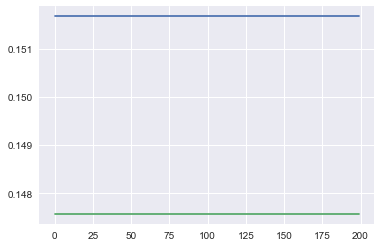

In [229]:
plt.plot([_ for _ in range(len(cmma))],cmma)
plt.plot([_ for _ in range(len(mmb))],mmb)

In [218]:
print(factor_mmb_cmma)

╒══════════════════════╤══════════════════╤══════════════════════════════════════════╕
│ money_market_bonus   │ collateral_mma   │   phi(money_market_bonus,collateral_mma) │
╞══════════════════════╪══════════════════╪══════════════════════════════════════════╡
│ money_market_bonus_0 │ collateral_mma_0 │                                   0.9049 │
├──────────────────────┼──────────────────┼──────────────────────────────────────────┤
│ money_market_bonus_0 │ collateral_mma_1 │                                   0.0799 │
├──────────────────────┼──────────────────┼──────────────────────────────────────────┤
│ money_market_bonus_1 │ collateral_mma_0 │                                   0.0751 │
├──────────────────────┼──────────────────┼──────────────────────────────────────────┤
│ money_market_bonus_1 │ collateral_mma_1 │                                   0.0953 │
╘══════════════════════╧══════════════════╧══════════════════════════════════════════╛


In [220]:
print(belief_nopriors['collateral_mma'].values[1])

0.151670177466


In [216]:
print(belief_nopriors['money_market_bonus'])

╒══════════════════════╤═══════════════════════════╕
│ money_market_bonus   │   phi(money_market_bonus) │
╞══════════════════════╪═══════════════════════════╡
│ money_market_bonus_0 │                    0.8524 │
├──────────────────────┼───────────────────────────┤
│ money_market_bonus_1 │                    0.1476 │
╘══════════════════════╧═══════════════════════════╛


In [3]:

esp_eligible_products = ['Money Market Bonus','Collateral MMA'
'Cash Management',
'FX Products',
'Letters of Credit',
'Enterprise Sweep',
'Checking USD']
# le week_n_one_time set, return individual probabilities of 
#     prob_checking, prob_cmma, prob_mmb, prob_cm, prob_fx, prob_loc, prob_es
#     start_time = time.time()
#     prob_mmb = []
#     prob_cmma = []
#     prob_cm = []
#     prob_fx = []
#     prob_loc = []
#     prob_es = []
#     prob_checking = []
def ESP_Markov_Model_Joint_Prob(esp_money_market_jointprob_probabilities,week_n_one_time= None,
                                      product_name = None,range_of_weeks=24,evidence_=None,single=True):
    """Returns the probability of having a given ESP product during a certain month.. 
    If no month_n is given, then will return distributions of each product per month for 24 months. 
    Otherwise, will only products for that month.
    If no product_name is given, then will return all products for a given month. Or, that particular product."""
    
    
    #WIth a sing
    prob_checking_original = []
    start_time = time.time()
    prob_mmb = []
    prob_cmma = []
    prob_cm = []
    prob_fx = []
    prob_loc = []
    prob_es = []
    prob_checking = []
    prob_given_month_no_priors_having_product = {}
    products =['money_market_bonus','collateral_mma','cash_management',
                                        'fx_products','letters_of_credit','enterprise_sweep','checking_usd']
    
    model = MarkovModel([('money_market_bonus', 'collateral_mma'), ('money_market_bonus', 'checking_usd'), 
                     ('money_market_bonus', 'cash_management'), ('money_market_bonus', 'fx_products'),
                    ('money_market_bonus', 'letters_of_credit'), ('money_market_bonus', 'enterprise_sweep'),
                    ('collateral_mma','cash_management'),('collateral_mma', 'fx_products'),('collateral_mma', 'letters_of_credit'),
                        ('collateral_mma', 'enterprise_sweep'),('collateral_mma', 'checking_usd'),('cash_management', 'fx_products'),
                        ('cash_management', 'fx_products'),('cash_management', 'letters_of_credit'),('cash_management', 'enterprise_sweep'),
                        ('cash_management', 'checking_usd'),('fx_products', 'letters_of_credit'),('fx_products', 'enterprise_sweep'),
                         ('fx_products', 'checking_usd'),('letters_of_credit', 'enterprise_sweep'),('letters_of_credit', 'checking_usd'),
                         ('enterprise_sweep', 'checking_usd')])
    
    model_mmb = MarkovModel([('money_market_bonus', 'collateral_mma'), ('money_market_bonus', 'checking_usd'), 
                     ('money_market_bonus', 'cash_management'), ('money_market_bonus', 'fx_products'),
                    ('money_market_bonus', 'letters_of_credit'), ('money_market_bonus', 'enterprise_sweep')])
    model_cmma = MarkovModel([('collateral_mma','cash_management'),('collateral_mma', 'fx_products'),
                              ('collateral_mma', 'letters_of_credit'),
                        ('collateral_mma', 'enterprise_sweep'),('collateral_mma', 'checking_usd'),
                              ('money_market_bonus', 'collateral_mma')])
    model_cm = MarkovModel([('cash_management', 'fx_products'),('cash_management', 'letters_of_credit'),
                            ('cash_management', 'enterprise_sweep'),
                        ('cash_management', 'checking_usd'),('collateral_mma','cash_management'),('money_market_bonus', 'cash_management')])
    model_checking = MarkovModel([('cash_management', 'checking_usd'),('collateral_mma', 'checking_usd'),('money_market_bonus', 'checking_usd'),
                                 ('collateral_mma', 'checking_usd'),('letters_of_credit', 'checking_usd'),('enterprise_sweep', 'checking_usd'),
                                 ('fx_products', 'checking_usd')])
    model_fx = MarkovModel([('fx_products', 'letters_of_credit'),('fx_products', 'enterprise_sweep'),
                         ('fx_products', 'checking_usd'),('cash_management', 'fx_products'),('collateral_mma', 'fx_products'),
                           ('money_market_bonus', 'fx_products')])
    model_loc = MarkovModel([('letters_of_credit', 'enterprise_sweep'),('letters_of_credit', 'checking_usd'),('fx_products', 'letters_of_credit'),
                             ('cash_management', 'letters_of_credit'),('collateral_mma', 'letters_of_credit'), ('money_market_bonus', 'letters_of_credit') ])
    model_es = MarkovModel([('enterprise_sweep', 'checking_usd'),('letters_of_credit', 'enterprise_sweep'),('fx_products', 'enterprise_sweep'),
                           ('cash_management', 'enterprise_sweep'),('collateral_mma', 'enterprise_sweep'),('money_market_bonus', 'enterprise_sweep')])
    
    def markov_inference(dict_of_esp_jointprob):
        factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_cmma0'], dict_of_esp_jointprob['mmb0_cmma1'],
                                    dict_of_esp_jointprob['mmb1_cmma0'], dict_of_esp_jointprob['mmb1_cmma1']])
        factor_mmb_cm = Factor(variables=['money_market_bonus', 'cash_management'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_jointprob['mmb0_cm0'], dict_of_esp_jointprob['mmb0_cm1'],
                                    dict_of_esp_jointprob['mmb1_cm0'], dict_of_esp_jointprob['mmb1_cm1']])
        factor_mmb_fx = Factor(variables=['money_market_bonus', 'fx_products'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_fx0'], dict_of_esp_jointprob['mmb0_fx1'],
                                    dict_of_esp_jointprob['mmb1_fx0'], dict_of_esp_jointprob['mmb1_fx1']])
        factor_mmb_loc = Factor(variables=['money_market_bonus', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_loc0'], dict_of_esp_jointprob['mmb0_loc1'],
                                    dict_of_esp_jointprob['mmb1_loc0'], dict_of_esp_jointprob['mmb1_loc1']])
        factor_mmb_es = Factor(variables=['money_market_bonus', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_es0'], dict_of_esp_jointprob['mmb0_es1'],
                                    dict_of_esp_jointprob['mmb1_es0'], dict_of_esp_jointprob['mmb1_es1']])  
        factor_mmb_checking = Factor(variables=['money_market_bonus', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_checking0'], dict_of_esp_jointprob['mmb0_checking1'],
                                    dict_of_esp_jointprob['mmb1_checking0'], dict_of_esp_jointprob['mmb1_checking1']])   
        # collateral mma

        factor_cmma_cm = Factor(variables=['collateral_mma','cash_management'],
                            cardinality=[2, 2],
                        values=[dict_of_esp_jointprob['cmma0_cm0'], dict_of_esp_jointprob['cmma0_cm1'],
                                dict_of_esp_jointprob['cmma1_cm0'], dict_of_esp_jointprob['cmma1_cm1']])

        factor_cmma_fx = Factor(variables=['collateral_mma', 'fx_products'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_jointprob['cmma0_fx0'], dict_of_esp_jointprob['cmma0_fx1'],
                                    dict_of_esp_jointprob['cmma1_fx0'], dict_of_esp_jointprob['cmma1_fx1']])
        factor_cmma_loc = Factor(variables=['collateral_mma', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cmma0_loc0'], dict_of_esp_jointprob['cmma0_loc1'],
                                    dict_of_esp_jointprob['cmma1_loc0'], dict_of_esp_jointprob['cmma1_loc1']])
        factor_cmma_es= Factor(variables=['collateral_mma', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cmma0_es0'], dict_of_esp_jointprob['cmma0_es1'],
                                    dict_of_esp_jointprob['cmma1_es0'], dict_of_esp_jointprob['cmma1_es1']])
        factor_cmma_checking = Factor(variables=['collateral_mma', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cmma0_checking0'], dict_of_esp_jointprob['cmma0_checking1'],
                                    dict_of_esp_jointprob['cmma1_checking0'],dict_of_esp_jointprob['cmma1_checking1']])  
        # cash management
        factor_cm_fx = Factor(variables=['cash_management', 'fx_products'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_jointprob['cm0_fx0'], dict_of_esp_jointprob['cm0_fx1'],
                                    dict_of_esp_jointprob['cm1_fx0'], dict_of_esp_jointprob['cm1_fx1']])
        factor_cm_loc = Factor(variables=['cash_management', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cm0_loc0'], dict_of_esp_jointprob['cm0_loc1'],
                                    dict_of_esp_jointprob['cm1_loc0'], dict_of_esp_jointprob['cm1_loc1']])
        factor_cm_es= Factor(variables=['cash_management', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cm0_es0'], dict_of_esp_jointprob['cm0_es1'],
                                    dict_of_esp_jointprob['cm1_es0'], dict_of_esp_jointprob['cm1_es1']])
        factor_cm_checking = Factor(variables=['cash_management', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cm0_checking0'], dict_of_esp_jointprob['cm0_checking1'],
                                    dict_of_esp_jointprob['cm1_checking0'], dict_of_esp_jointprob['cm1_checking1']])  

        # FX products
        factor_fx_loc = Factor(variables=['fx_products', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['fx0_loc0'], dict_of_esp_jointprob['fx0_loc1'],
                                    dict_of_esp_jointprob['fx1_loc0'], dict_of_esp_jointprob['fx1_loc1']])
        factor_fx_es= Factor(variables=['fx_products', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['fx0_es0'], dict_of_esp_jointprob['fx0_es1'],
                                    dict_of_esp_jointprob['fx1_es0'], dict_of_esp_jointprob['fx1_es1']])
        factor_fx_checking = Factor(variables=['fx_products', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['fx0_checking0'], dict_of_esp_jointprob['fx0_checking1'],
                                    dict_of_esp_jointprob['fx1_checking0'], dict_of_esp_jointprob['fx1_checking1']])  

        # letters of credit

        factor_loc_es= Factor(variables=['letters_of_credit', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['loc0_es0'], dict_of_esp_jointprob['loc0_es1'],
                                    dict_of_esp_jointprob['loc1_es0'], dict_of_esp_jointprob['loc1_es1']])
        factor_loc_checking = Factor(variables=['letters_of_credit', 'checking_usd'],
                         cardinality=[2, 2],
                         values=[dict_of_esp_jointprob['loc0_checking0'], dict_of_esp_jointprob['loc0_checking1'],
                                dict_of_esp_jointprob['loc1_checking0'], dict_of_esp_jointprob['loc1_checking1']])  
        #enterprise sweep

        factor_es_checking = Factor(variables=['enterprise_sweep', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['es0_checking0'], dict_of_esp_jointprob['es0_checking1'],
                                    dict_of_esp_jointprob['es1_checking0'], dict_of_esp_jointprob['es1_checking1']])  


#         model.add_factors(factor_mmb_cmma , factor_mmb_cm, factor_mmb_fx, factor_mmb_loc,factor_mmb_es, factor_mmb_checking,
#                           factor_cmma_cm , factor_cmma_fx, factor_cmma_loc, factor_cmma_es,factor_cmma_checking,
#              factor_cm_fx,   factor_cm_loc,    factor_cm_es,  factor_cm_checking , factor_fx_loc,
#                   factor_fx_es ,  factor_fx_checking,   factor_loc_es, factor_loc_checking , factor_es_checking )#,
        model_mmb.add_factors(factor_mmb_cmma , factor_mmb_cm, factor_mmb_fx, factor_mmb_loc,factor_mmb_es, factor_mmb_checking)
        model_cmma.add_factors(factor_cmma_cm , factor_cmma_fx, factor_cmma_loc, factor_cmma_es,factor_cmma_checking,factor_mmb_cmma )
        model_cm.add_factors(factor_cm_fx,   factor_cm_loc,    factor_cm_es,  factor_cm_checking,factor_cmma_cm,factor_mmb_cm)
        model_checking.add_factors(factor_mmb_checking,factor_cmma_checking,factor_cm_checking,factor_fx_checking,factor_loc_checking , factor_es_checking)
        model_fx.add_factors(factor_fx_es ,  factor_fx_checking,factor_fx_loc, factor_cm_fx,factor_cmma_fx,factor_mmb_fx)
        model_loc.add_factors(factor_loc_es, factor_loc_checking, factor_fx_loc,factor_cm_loc,factor_cmma_loc,factor_mmb_loc  )
        model_es.add_factors(factor_es_checking ,factor_loc_es,factor_fx_es,factor_cm_es,factor_mmb_es,factor_cmma_es)
        #print(model.markov_blanket('money_market_bonus'))
        #belief_propagation = BeliefPropagation(model)
        belief_propagation_mmb = BeliefPropagation(model_mmb)
        belief_propagation_cmma = BeliefPropagation(model_cmma)
        belief_propagation_cm = BeliefPropagation(model_cm)
        belief_propagation_checking = BeliefPropagation(model_checking)
        belief_propagation_fx = BeliefPropagation(model_fx)
        belief_propagation_loc = BeliefPropagation(model_loc)
        belief_propagation_es = BeliefPropagation(model_es)
        #var_elimination = VariableElimination(model)
        
        all_products = ['money_market_bonus','collateral_mma', 'cash_management','enterprise_sweep',
                                    'fx_products','letters_of_credit','checking_usd']
        

        # perform inference for all product except the one in the for loop
        for prod in all_products:
            if evidence_==None:
                new_evidence=evidence_

            else:
                new_evidence = {key: value for key, value in evidence_.items() 
                 if key != prod}
            belief_inference_products = str(prod)
            #print(belief_inference_products,'belief inference')
        # go through and only look at one varaible at a time for inference


            #belief = belief_propagation.query(variables=[belief_inference_products], evidence=new_evidence)
            
            belief_mmb = belief_propagation_mmb.query(variables=[belief_inference_products], evidence=new_evidence)
            belief_cmma = belief_propagation_cmma.query(variables=[belief_inference_products], evidence=new_evidence)
            belief_cm = belief_propagation_cm.query(variables=[belief_inference_products], evidence=new_evidence)
            belief_checking = belief_propagation_checking.query(variables=[belief_inference_products], evidence=new_evidence)
            belief_fx = belief_propagation_fx.query(variables=[belief_inference_products], evidence=new_evidence)
            belief_loc = belief_propagation_loc.query(variables=[belief_inference_products], evidence=new_evidence)
            belief_es = belief_propagation_es.query(variables=[belief_inference_products], evidence=new_evidence)
            #return belief_nopriors
            try:
                mmb = belief_mmb['money_market_bonus'].values[1]
                if mmb <0 :
                    mmb = .0000001
                elif mmb >1:
                    mmb =1
                prob_mmb.append(mmb)# one is having the product
            except:
                pass
            try:
                cmma = belief_cmma['collateral_mma'].values[1]
                if cmma <0:
                    cmma = .0000001
                elif cmma >1:
                    cmma =1
                prob_cmma.append(cmma)
            except:## don't have this product
                pass
            try:
                cm = belief_cm['cash_management'].values[1]
                if cm <0:
                    cm = .0000001
                elif cm >1:
                    cm =1
                prob_cm.append(cm)
            except:
                pass
            try:
                checking = belief_checking['checking_usd'].values[1]
                if checking <0:
                    checking = .0000001
                elif checking >1:
                    checking =1
                prob_checking.append(checking)
            except:
                pass
            try:
                fx = belief_fx['fx_products'].values[1]
                if fx <0:
                    fx = .0000001
                elif fx >1:
                    fx =1
                prob_fx.append(fx)
            except:
                pass
            try:
                loc = belief_loc['letters_of_credit'].values[1]
                if loc <0:
                    loc = .0000001
                elif loc > 1:
                    loc = 1
                prob_loc.append(loc)
            except:
                
                pass
            try:
                es = belief_es['enterprise_sweep'].values[1]
                if es<0:
                    es = .0000001
                elif es >1:
                    es = 1
                prob_es.append(es)
            except:
                pass



    if single==False:
        for week_n_loop in range(range_of_weeks):
            dict_of_esp_jointprob = esp_money_market_jointprob_probabilities(week_n_loop)
            markov_inference(dict_of_esp_jointprob)
    else:
        dict_of_esp_jointprob = esp_money_market_jointprob_probabilities(week_n_one_time)
        markov_inference(dict_of_esp_jointprob)
        # the order of the factor model is a0_b0, a0_b1, ,a1_b0, a1_b1
        #http://conference.scipy.org/proceedings/scipy2015/pdfs/ankur_ankan.pdf
        
    print(prob_checking,'checking', prob_cmma,'cmma', prob_mmb,'mmb', prob_cm,'cm', prob_fx,'fx', prob_loc,'loc',
          prob_es,'es',prob_checking_original,'checking original')
    #return prob_checking, prob_cmma, prob_mmb, prob_cm, prob_fx, prob_loc, prob_es, prob_checking_original
    return prob_checking[0], prob_cmma[0], prob_mmb[0], prob_cm[0], prob_fx[0], prob_loc[0], prob_es[0]

    end_time = time.time()
    print('{} weeks took {} seconds'.format(range_of_weeks,end_time-start_time))

        


In [832]:
checking, cmma, mmb , cm, fx, loc, es = ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,
                                                                    week_n_one_time=1,evidence_={'money_market_bonus':1,
                                                                                                 'collateral_mma':1,
                                                       'cash_management':1,'enterprise_sweep':1,
                                    'fx_products':1,'letters_of_credit':1,'checking_usd':1}) 

[1] checking [0.30298640470057592] cmma [1e-07] mmb [0.51651086596994622] cm [0.96204418046480766] fx [0.99965240002418021] loc [1e-07] es [] checking original


In [876]:
checking, cmma, mmb , cm, fx, loc, es = ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,
                                                                    week_n_one_time=1,
                                            evidence_={'money_market_bonus':0,'collateral_mma':0,
                                                       'cash_management':0,'enterprise_sweep':0,
                                    'fx_products':0,'letters_of_credit':0,'checking_usd':0}) 

[0.99923176046362727] checking [0.096166520272165004] cmma [1e-07] mmb [0.0240042787866033] cm [0.33437927272743223] fx [0.91668096236822894] loc [0.61803996529202598] es [] checking original


In [861]:
ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=1,
                                            evidence_={'money_market_bonus':0,'collateral_mma':0,
                                                       'cash_management':0,'enterprise_sweep':0,
                                    'fx_products':0,'letters_of_credit':0,'checking_usd':0}) 

[0.99923176046362727] checking [0.096166520272165004] cmma [1e-07] mmb [0.0240042787866033] cm [0.33437927272743223] fx [0.91668096236822894] loc [0.61803996529202598] es [] checking original


(0.99923176046362727,
 0.096166520272165004,
 1e-07,
 0.0240042787866033,
 0.33437927272743223,
 0.91668096236822894,
 0.61803996529202598)

In [877]:
ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=80,
                                            evidence_={'money_market_bonus':1,'collateral_mma':1,
                                                       'cash_management':1,'enterprise_sweep':1,
                                    'fx_products':1,'letters_of_credit':1,'checking_usd':1}) 

[0.89033430790431212] checking [0.97172363458359101] cmma [0.67404681842728564] mmb [0.98241772796297855] cm [0.26600704267550296] fx [0.022167182390045139] loc [1] es [] checking original


(0.89033430790431212,
 0.97172363458359101,
 0.67404681842728564,
 0.98241772796297855,
 0.26600704267550296,
 0.022167182390045139,
 1)

In [7]:
## new probs
probs = [ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=i) for i in range(152)]

[0.9999999221514283] checking [1e-07] cmma [1e-07] mmb [0.065680725972112095] cm [0.0067570431317653659] fx [0.31225212474567804] loc [0.038801862814969758] es [] checking original
[0.99999992495516843] checking [1e-07] cmma [1e-07] mmb [0.077798317606891987] cm [0.0075854012376916713] fx [0.30257628184879237] loc [0.046944004579951432] es [] checking original
[0.99999992764298207] checking [1e-07] cmma [1e-07] mmb [0.09109494663745106] cm [0.0084745934086998386] fx [0.2927028059050476] loc [0.052549249139070144] es [] checking original
[0.9999999302218725] checking [1e-07] cmma [1e-07] mmb [0.10561167538061283] cm [0.0094267009708262454] fx [0.28261627108693715] loc [0.056423076972302047] es [] checking original
[0.99999993269827303] checking [1e-07] cmma [1e-07] mmb [0.12138056560600038] cm [0.010443820882649951] fx [0.27229947377358715] loc [0.059021214871781656] es [] checking original
[0.99999993507810347] checking [1e-07] cmma [1e-07] mmb [0.13842288049017848] cm [0.0115280654247

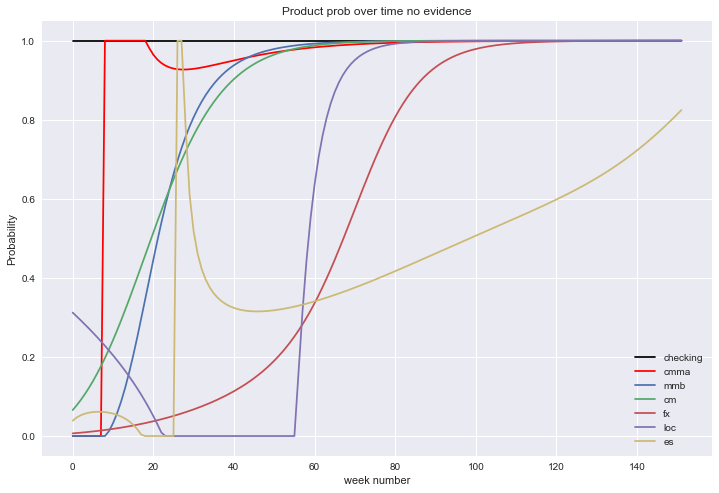

In [8]:
## FINAL - new probs
plt.figure(figsize=(12,8))
plt.plot([probs[i][0] for i in range(len(probs))],label='checking',color='black')
plt.plot([probs[i][1] for i in range(len(probs))],label='cmma',color='red')
plt.plot([probs[i][2] for i in range(len(probs))],label='mmb')
plt.plot([probs[i][3] for i in range(len(probs))],label='cm')
plt.plot([probs[i][4] for i in range(len(probs))],label='fx')
plt.plot([probs[i][5] for i in range(len(probs))],label='loc')
plt.plot([probs[i][6] for i in range(len(probs))],label='es')
#plt.plot([probs[i][7] for i in range(len(probs))],label='ORIGINAL CHECKING')
plt.legend()
plt.title('Product prob over time no evidence')
plt.xlabel('week number')
plt.ylabel('Probability')

In [26]:
## new probs
probs_allzero = [ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=i,
                                            evidence_={'money_market_bonus':0,'collateral_mma':0,
                                                       'cash_management':0,'enterprise_sweep':0,
                                    'fx_products':0,'letters_of_credit':0,'checking_usd':0}) for i in range(104)]

[0.99999988522554828] checking [0.010665327198786857] cmma [0.0011067424798894402] mmb [2.7765046094405445e-06] cm [1e-07] fx [1e-07] loc [5.4226494150548985e-06] es [] checking original
[0.99999988666783635] checking [0.011315121915700716] cmma [0.0011672885020196141] mmb [2.8637037312980208e-06] cm [1e-07] fx [1e-07] loc [6.2812844431826914e-06] es [] checking original
[0.9999998881283495] checking [0.011991281781052424] cmma [0.0012300640684741674] mmb [2.9537200420241119e-06] cm [1e-07] fx [1e-07] loc [7.1945800779564206e-06] es [] checking original
[0.99999988960702324] checking [0.012694489777555829] cmma [0.0012951606077880333] mmb [3.0466599624872627e-06] cm [1e-07] fx [0.014385557612259417] loc [8.1649117474124999e-06] es [] checking original
[0.99999989110377663] checking [0.01342543499028217] cmma [0.0013626741497237747] mmb [3.1426346695401369e-06] cm [1e-07] fx [0.033252650597992373] loc [9.1947796843874066e-06] es [] checking original
[0.99999989261851085] checking [0.014

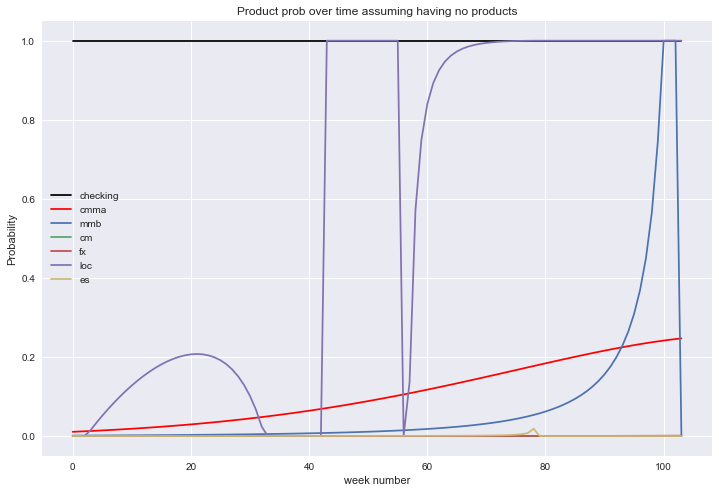

In [28]:
## FINAL
plt.figure(figsize=(12,8))
plt.plot([probs_allzero[i][0] for i in range(len(probs_allzero))],label='checking',color='black')
plt.plot([probs_allzero[i][1] for i in range(len(probs_allzero))],label='cmma',color='red')
plt.plot([probs_allzero[i][2] for i in range(len(probs_allzero))],label='mmb')
plt.plot([probs_allzero[i][3] for i in range(len(probs_allzero))],label='cm')
plt.plot([probs_allzero[i][4] for i in range(len(probs_allzero))],label='fx')
plt.plot([probs_allzero[i][5] for i in range(len(probs_allzero))],label='loc')
plt.plot([probs_allzero[i][6] for i in range(len(probs_allzero))],label='es')
#plt.plot([probs[i][7] for i in range(len(probs))],label='ORIGINAL CHECKING')
plt.legend()
plt.title('Product prob over time assuming having no products')
plt.xlabel('week number')
plt.ylabel('Probability')

In [29]:
## new probs all evidence = 1
probs_allone = [ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=i,
                                            evidence_={'money_market_bonus':1,'collateral_mma':1,
                                                       'cash_management':1,'enterprise_sweep':1,
                                    'fx_products':1,'letters_of_credit':1,'checking_usd':1}) for i in range(104)]

[0.99999999999985933] checking [0.91853338363793935] cmma [1] mmb [1] cm [1] fx [1] loc [0.11387849724148365] es [] checking original
[0.99999999999987244] checking [0.88438933530806041] cmma [1] mmb [1e-07] cm [1] fx [1] loc [0.10386088206768587] es [] checking original
[0.99999999999988376] checking [0.72523169432097989] cmma [1e-07] mmb [1e-07] cm [1] fx [1] loc [0.094405622906088824] es [] checking original
[0.99999999999989375] checking [1] cmma [1e-07] mmb [0.46401746945652173] cm [0.96868883552094065] fx [1] loc [0.0854694922480181] es [] checking original
[0.99999999999990252] checking [1] cmma [1] mmb [0.67035675356258373] cm [0.93587657412194769] fx [1] loc [0.077015283914720747] es [] checking original
[0.99999999999991041] checking [1] cmma [1] mmb [0.77235253367493772] cm [0.91092288905762797] fx [1] loc [0.06901154929826242] es [] checking original
[0.9999999999999174] checking [1] cmma [1] mmb [0.83237363483395832] cm [0.89137358914475562] fx [1] loc [0.06143241881427882

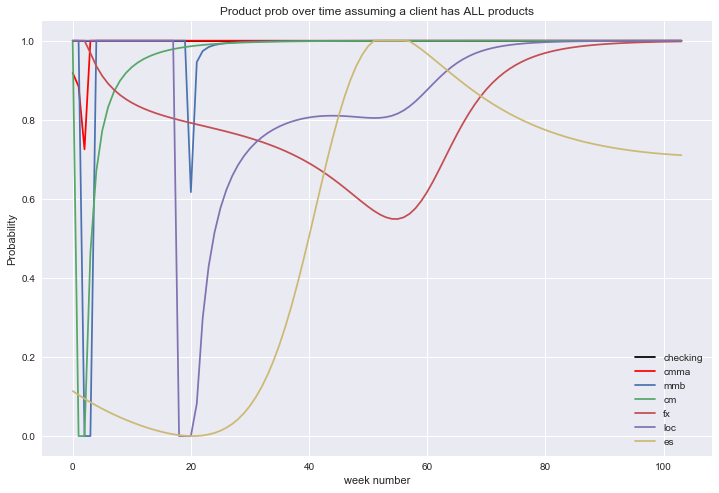

In [30]:
## FINAL
plt.figure(figsize=(12,8))
plt.plot([probs_allone[i][0] for i in range(len(probs_allone))],label='checking',color='black')
plt.plot([probs_allone[i][1] for i in range(len(probs_allone))],label='cmma',color='red')
plt.plot([probs_allone[i][2] for i in range(len(probs_allzero))],label='mmb')
plt.plot([probs_allone[i][3] for i in range(len(probs_allone))],label='cm')
plt.plot([probs_allone[i][4] for i in range(len(probs_allone))],label='fx')
plt.plot([probs_allone[i][5] for i in range(len(probs_allone))],label='loc')
plt.plot([probs_allone[i][6] for i in range(len(probs_allone))],label='es')
#plt.plot([probs[i][7] for i in range(len(probs))],label='ORIGINAL CHECKING')
plt.legend()
plt.title('Product prob over time assuming a client has ALL products')
plt.xlabel('week number')
plt.ylabel('Probability')

## CLient Lifetime - units are months

In [33]:
exponential_lifetime_parameters = (0.99999999990617705, 4.3807421352102089)

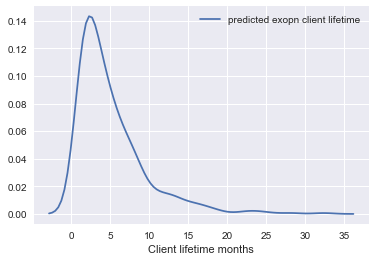

In [36]:
sns.kdeplot(stats.expon(*exponential_lifetime_parameters ).rvs(500), label='predicted exopn client lifetime')
plt.xlabel('Client lifetime months')